# Gas

In [1]:
from init import *
init()

import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
from utils import plot_df

import numpy as np
import os
import pandas as pd

from mll.LSTMPredictor import LSTMPredictor

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

Loading CHRIS/CME_CL1 dataset...
Loading CHRIS/CME_CL2 dataset...
Loading CHRIS/CME_CL3 dataset...
Loading CHRIS/CME_CL4 dataset...
Loading CHRIS/CME_CL5 dataset...


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000145865FF408>,
      dtype=object)

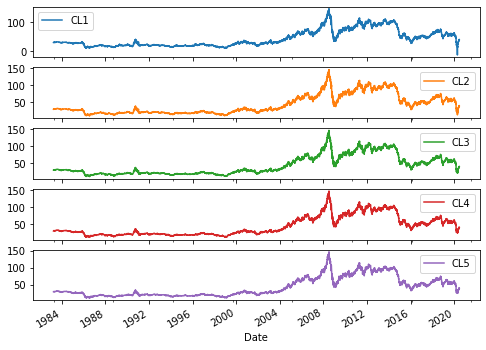

In [2]:
import mll.QuandlFeed as qf
df = qf.get_data({'CHRIS/CME_' + k: k for k in ['CL1', 'CL2', 'CL3', 'CL4', 'CL5']}, 'Last').dropna()
df.plot(subplots=True)

In [3]:
predictor = LSTMPredictor(df, 'CL3', train_split=int( len(df)*.7 ), past_history=720, future_target=72, seed=13)
multi_step_model = predictor.multi_step_model
multi_step_history = predictor.multi_step_history

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 29s 143ms/step - loss: 0.3073 - val_loss: 0.5919
Epoch 2/10
200/200 [==============================] - 18s 90ms/step - loss: 0.1536 - val_loss: 0.3317
Epoch 3/10
200/200 [==============================] - 20s 99ms/step - loss: 0.1363 - val_loss: 0.3984
Epoch 4/10
200/200 [==============================] - 21s 107ms/step - loss: 0.1224 - val_loss: 0.6574
Epoch 5/10
200/200 [==============================] - 22s 108ms/step - loss: 0.1135 - val_loss: 0.4405
Epoch 6/10
200/200 [==============================] - 21s 103ms/step - loss: 0.1070 - val_loss: 0.5871
Epoch 7/10
200/200 [==============================] - 17s 84ms/step - loss: 0.1029 - val_loss: 0.6428
Epoch 8/10
200/200 [==============================] - 21s 107ms/step - loss: 0.0996 - val_loss: 0.4831
Epoch 9/10
200/200 [==============================] - 22s 111ms/step - loss: 0.0991 - val_loss: 0.5345
Epoch 10/10
200/200 [============

In [4]:
from utils import plot_df
from ipywidgets import interact, IntSlider
# from IPython.display import display
max_count = 20
dfs = predictor.multi_step_dfs(max_count)
fig = plot_df(dfs[0])

@interact(step=IntSlider(min=1, max=max_count, step=1, value=1))
def update(step):
    global dfs
    with fig.batch_update():
        df = dfs[step-1]
        fig.data[0].y = df['True Future'].values
        fig.data[1].y = df['Predicted Future'].values #np.concatenate([np.full(719, None), np.full(72,step)])
fig

interactive(children=(IntSlider(value=1, description='step', max=20, min=1), Output()), _dom_classes=('widget-…

FigureWidget({
    'data': [{'name': 'True Future',
              'type': 'scatter',
              'uid': '116…

# Negative prices issue

In [ ]:
# Another possible problem: price collapse to negative values
# plot_df(df, x_title='Dates', y_title='Prices', title='Crude Oil')
plot_df(df[-100:], x_title='Dates', y_title='Prices', title='Crude Oil')